<h1>RNNs in TensorFlow</h1>

Das Notebook zeigt kurz wie RNNs in TensorFlow verwendet werden können.

In dem Notebook NN_RNN wurden die verschiedenen Varianten der RNN Netze gezeigt. Man hat deutlich gesehen das LSTM und GRU Zellen deutlich aufwendiger sind als herkömmliche RNN Zellen.

Dank Frameworks wie PyTorch und TensorFlow können solche Netze einfach aufgebaut und verwendet werden. Diese beinhalten die volle Implementierung dieser Zellen und bieten verschiedene Umgangsformen an.

In [62]:
# Imports. 
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import visualkeras

Übersicht der RNN Typen:

<i>Abb1</i>: Vanilla-RNN Veranschaulichung. Kontext / Memory.

<img src="../img/2_rnn.PNG" height=800 width=600>


<i>Abb2</i>: LSTM Zelle Schaubild.

<img src="../img/14_rnn.PNG" height=700 width=700>


<i>Abb3</i>: GRU Zelle Schaubild.

<img src="../img/15_rnn.PNG" height=700 width=700>

TensorFlow Keras bietet drei grundlegende Typen an: Vanilla-RNN, LSTM und GRU.: <br>
1. keras.layers.SimpleRNN 
2. keras.layers.GRU 
3. keras.layers.LSTM

Siehe auch:<br>
Enthählt weitere Details wie Optimierung.
- Recurrent layers: https://keras.io/api/layers/recurrent_layers/  [Letzter Zugriff: 29.08.2024]

Es werden Dropouts unterstützt `dropout`, `recurrent_dropout` und Loop Unrolling. Weitere Details in der Dokumentation.

<h2>In Tensorflow</h2>

In [3]:
# Erstelle Model # 

model = keras.Sequential()
# Füge Embedding hinzu. 
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Füge LSTM Zellen ein. Ein Layer mit 128 Zellen.
model.add(layers.LSTM(128))

# Output
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Im Normalfall gibt es nur einen Outputvektor, der den Zellzustand wiedergibt. Dabei ist die Shape `(batch_size, units)`. 

Ein RNN Layer kann auch eine ganze Sequenz eines Outputs eines Samples ausgebenm dafür kann `return_sequences=True` eingestellt werden.<br>
Shape: `(batch_size, timesteps, units)`

In [5]:
# Layers haben viele Parameter
# - Siehe Dok.

model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))  # Zwei Layers

# Output 3D Tensor: (batch_size, timesteps, units)
model.add(layers.GRU(units=256, return_sequences=True))

model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Zusätzlich ist es möglich den internen letztendlichen Zustand/Zustände auszugeben. Das kann dann verwendet werden, um die Ausführung des RNN fortzusetze oder findet auch Anwendung in der Sequenz-to-Sequenz wie bei Übersetzungen. Dafür wird ein Encoder-Decoder, wo der Zustand des Encoders als Initialisierung des Decoders verwendet wird.

Um den Zustand auszugeben: `return_state=True` <br>
LSTM hat zwei Zustände, GRU hat einen, die ausgegeben werden können.

In [11]:
# Beispiel mit Encoder-Decoder # 
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)

# Zustände in einem zusätzlichen Output #
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)

# Jetzt diese zwei Zustände dem LSTM als Initialzustände übergeben. # 
decoder_output = layers.LSTM(64, name="decoder")(decoder_embedded, initial_state=encoder_state)

output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_output], output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_25CLO… │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10)        │        650 │ keras_tensor_25C… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

<h3>Cross-batch statefulness: Lange Sequenzen</h3>

Im Normalfall wird der Zustand der Zelle zurückgesetzt, wenn ein neuer Batch kommt. Jedes Batch wird als eine Sequenz betrachtet, die unabhängig von den vergangenen Sequenzen ist.

Bei sehr langen Sequenzen ist es sinnvoll diese in Teile zu schneiden. Diese Teile werden dann Stückweise in das Netz eingegeben, ohne den Zustand der Zelle zurückzusetzen. Dafür wird der Parameter `stateful=True` gesetzt.
- Sequenz: [t0, t1, ..., t400]. Daraus wird.: <br>
  s1 = [t1, t2, ..., t100] <br>
  s2 = [t101 t102, ..., t201], ...
  

Der Zustand kann auch manuell zurückgesetzt werden: `layer.reset_states()`

In [15]:
# Beispiel mit Code # 
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

lstm_layer.reset_states()

<h3>RNN Zustände wiederverwenden</h3>

Wie erwähnt könne die Zustände eines RNNs genutzt werden, um damit neue RNNs zu initialisieren.
Mit `layer.weights()` wie sonst auch lassen sich die Zustände der Layers nicht ausgeben, dafür nutzen wir `layer.states`. Danach kann mit `new_layer(inputs, initial_state=layer.states)` der Zustand gesetzt werden.

In [16]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

# Gebe Zustand aus # 
existing_state = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)  # Setze Zustand #

<h3>Bidirektionale RNNs</h3>

Bidirektionale RNNs sind auch wichtig, z. B. bei ENR wenn bestimmte Wörter in einem Kontext verschiedene Bedeutungen haben können (Siehe NN_RNN Notebook). 

<i>Abb4</i>: Bidirektional RNN.

<img src="../img/17_rnn.PNG" height=520 width=720>

Der Aufbau ist deutlich aufwendiger, liefert bei Texten aber auch bessere Ergebnisse. Mit Keras kann diese Architektur einfach genutzt werden.

In [18]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 5, 128)         │        38,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

Weitere Details dazu findet man in der API Dokumentation.

<h1>Weitere Analysen und Details</h1>

Hier wollen wir uns weitere Details anschauen.


In [30]:
# Erstelle sequentielle Daten # 
def generate_sequences(length=10, n_samples=1000):
    X = []
    y = []
    for _ in range(n_samples):
        start    = np.random.randint(0, 50)  # Starte bei einer Zahl
        sequence = np.arange(start, start + length)  # Zähle hoch ab start. 
        
        X.append(sequence[:-1])
        y.append(sequence[-1])
        #  y: nächste Zahl
    return np.array(X), np.array(y)

X, y = generate_sequences()

So könnten dann die Daten aussehen.

In [31]:
X

array([[ 2,  3,  4, ...,  8,  9, 10],
       [40, 41, 42, ..., 46, 47, 48],
       [39, 40, 41, ..., 45, 46, 47],
       ...,
       [ 6,  7,  8, ..., 12, 13, 14],
       [11, 12, 13, ..., 17, 18, 19],
       [ 0,  1,  2, ...,  6,  7,  8]])

In [34]:
# Reshape, da ein 3D Tensor erwartet wird.
X = X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[ 2],
        [ 3],
        [ 4],
        ...,
        [ 8],
        [ 9],
        [10]],

       [[40],
        [41],
        [42],
        ...,
        [46],
        [47],
        [48]],

       [[39],
        [40],
        [41],
        ...,
        [45],
        [46],
        [47]],

       ...,

       [[ 6],
        [ 7],
        [ 8],
        ...,
        [12],
        [13],
        [14]],

       [[11],
        [12],
        [13],
        ...,
        [17],
        [18],
        [19]],

       [[ 0],
        [ 1],
        [ 2],
        ...,
        [ 6],
        [ 7],
        [ 8]]])

<h2>RNN</h2>

In [38]:
def build_rnn_model():
    model = keras.Sequential()
    # Aktivierungsfunktion Standard: tanh
    model.add(layers.SimpleRNN(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_model = build_rnn_model()
rnn_history = rnn_model.fit(X, y, epochs=20, verbose=0, validation_split=0.2)

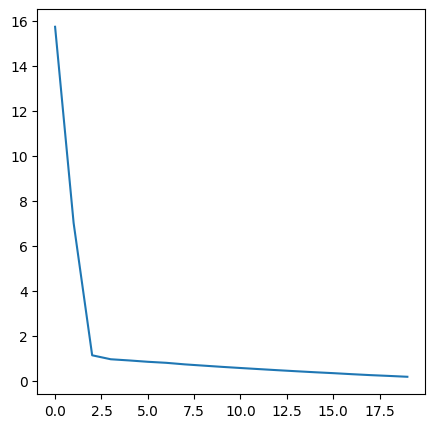

In [45]:
plt.figure(figsize=(5,5))
plt.plot(rnn_history.history['val_loss'])

In [57]:
def make_predictions(model, sample_sequence):
    print(f"Sequenz:\n{sample_sequence.reshape((1,len(sample_sequence)))}")
    sample_sequence = sample_sequence.reshape((1, len(sample_sequence), 1))
    return model.predict(sample_sequence) #[0, 0]

In [60]:
result = make_predictions(rnn_model, X[8])
result

Sequenz:
[[39 40 41 42 43 44 45 46 47]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[48.12533]], dtype=float32)

In [134]:
###########################################################################################################################

Hier soll der Basiseffekt einer einfachen RNN Zelle nachverfolgt werden.

Dafür muss Bias ausgeschaltet werden, dann müssen die Startgewichte auf 1 gesetzt werden. Dabei muss die Aktivierungsfunktion auch linear sein.
Dadurch können wir jetzt den Basiseffekt einer einfachen Zelle nachverfolgen.

In [132]:
model = keras.Sequential()

rnn_layer = layers.SimpleRNN(1, input_shape=(4, 1), activation='linear', use_bias=False)
model.add(rnn_layer)

model.build()

initial_weights   = np.array([[1.0]], dtype=np.float32)  # Input weight
recurrent_weights = np.array([[1.0]], dtype=np.float32)  # Recurrent weight
rnn_layer.set_weights([initial_weights, recurrent_weights])

model.summary()

C:\Users\Alexander\anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_24 (SimpleRNN)       │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.build()

In [133]:
Number = model.predict(np.array([[1,2,1,1]]))
Number

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[5.]], dtype=float32)

Als Schritte: <br>
1. $Input: x_1 = 1$ <br>
   $Output: h1= w_{in} * x_1 = 1 * 1 = 1$
2. $Input: x_2 = 2$ <br>
   $Output: h2= w_{in} * x_2  + w_{rec} * h_1 = 1 * 2 + 1 * 1 = 3$
3. $Input: x_3 = 1$ <br>
   $Output: h3= w_{in} * x_3  + w_{rec} * h_2 = 1 * 1 + 1 * 3 = 4$
4. $Input: x_4 = 1$ <br>
   $Output: h4= w_{in} * x_4  + w_{rec} * h_3 = 1 * 1 + 1 * 4 = 5$